# Práctica 2: Aprendizaje automático

__Fecha de entrega: 27 de marzo de 2023__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 2 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

__Número de grupo: XX__

__Nombres de los estudiantes: XXX y XXX__

# Apartado 2: Clasificación

## 1) Carga del conjunto de datos

---



En este notebook trabajaremos con un conjunto de datos con diferentes características médicas de personas. El objetivo es establecer un diagnóstico sobre si tiene dolor lumbar o no.

Las variables del conjunto de datos son las siguientes: pelvic_incidence, pelvic_tilt, lumbar_lordosis_angle, sacral_slope, pelvic_radius, degree_spondylolisthesis, pelvic_slope, Direct_tilt, thoracic_slope, cervical_tilt, sacrum_angle, scoliosis_slope.

Crea un dataframe a partir del fichero `lower_back_pain_dataset2.csv` que se proporciona junto con la práctica.



In [19]:
import pandas as pd

df = pd.read_csv("./lower_back_pain_dataset2.csv", index_col=0)

df.dropna(inplace=True)

,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att
pelvic_incidence,,,,,,,,,,,,
63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...
47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,Normal
53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,Normal
61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,Normal


## 2) Análisis de los datos

Comprueba si las clases a predecir están equilibradas y explica cómo afecta tener o no clases equilibradas a la hora de entrenar y evaluar un modelo.

Calcula la correlación de las variables con la variable `Class_att`. ¿Cuáles tienen mayor correlación con la variable de salida? ¿Qué conclusiones puedes extraer?

Comprueba los rangos y distribuciones de las variables numéricas con mayor correlación con la variable `Class_att`. Dibuja el diagrama de dispersión entre cada par de variables asignando un color diferente a los puntos que se corresponden con cada una de las 2 categorías a predecir. ¿Hay pares de variables que separen bien las clases? 

A tenor de todo el análisis, ¿crees que va a ser un problema sencillo o complicado de resolver?

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not pelvic_incidence
63.027817    blue
39.056951    blue
68.832021    blue
69.297008    blue
49.712859    blue
             ... 
47.903565     NaN
53.936748     NaN
61.446597     NaN
45.252792     NaN
33.841641     NaN
Name: Class_att, Length: 310, dtype: object

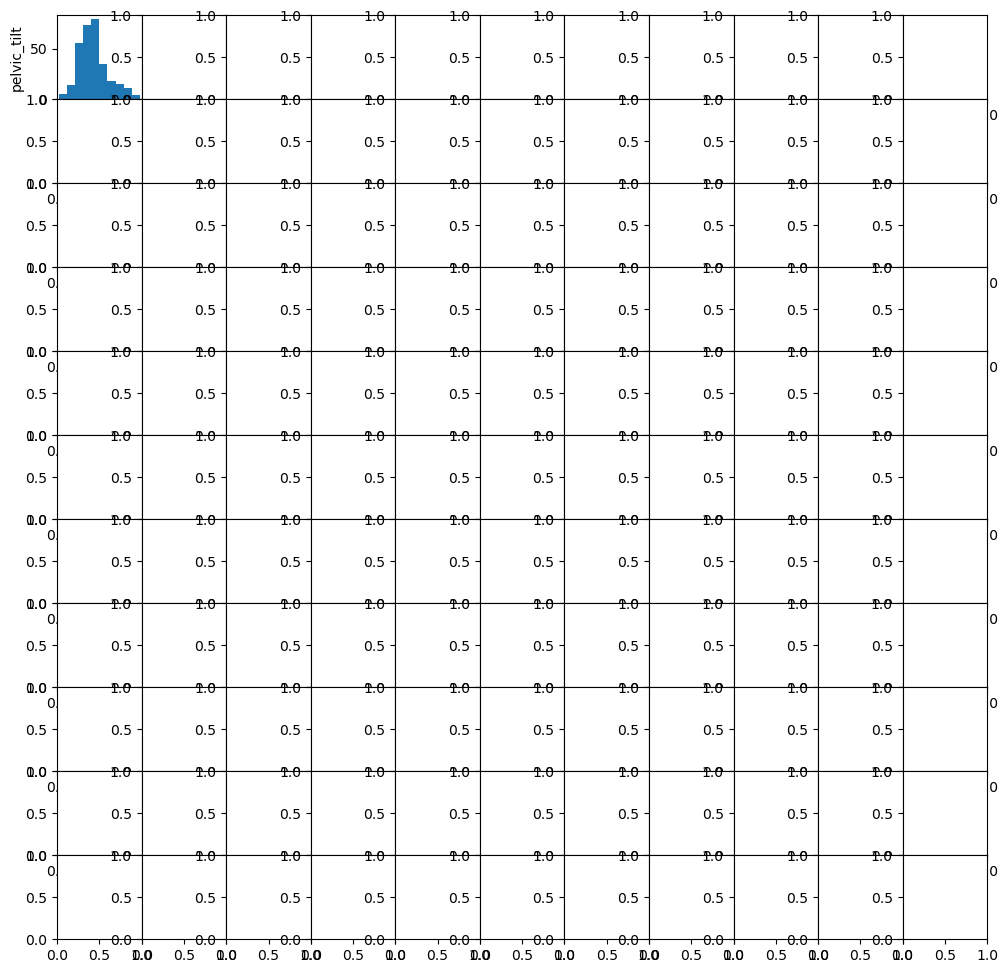

In [20]:
from pandas.plotting import scatter_matrix
%matplotlib inline

dic_colors = {'Abnormal': 'blue', 'normal': 'red'}
colors = df['Class_att'].map(dic_colors)

scatter_matrix(df, figsize=(12, 12), diagonal='hist', c=colors)


array([[<AxesSubplot: xlabel='pelvic_tilt', ylabel='pelvic_tilt'>,
        <AxesSubplot: xlabel='lumbar_lordosis_angle', ylabel='pelvic_tilt'>,
        <AxesSubplot: xlabel='sacral_slope', ylabel='pelvic_tilt'>,
        <AxesSubplot: xlabel='pelvic_radius', ylabel='pelvic_tilt'>,
        <AxesSubplot: xlabel='degree_spondylolisthesis', ylabel='pelvic_tilt'>,
        <AxesSubplot: xlabel='pelvic_slope', ylabel='pelvic_tilt'>,
        <AxesSubplot: xlabel='Direct_tilt', ylabel='pelvic_tilt'>,
        <AxesSubplot: xlabel='thoracic_slope', ylabel='pelvic_tilt'>,
        <AxesSubplot: xlabel='cervical_tilt', ylabel='pelvic_tilt'>,
        <AxesSubplot: xlabel='sacrum_angle', ylabel='pelvic_tilt'>,
        <AxesSubplot: xlabel='scoliosis_slope', ylabel='pelvic_tilt'>,
        <AxesSubplot: xlabel='Class_att', ylabel='pelvic_tilt'>],
       [<AxesSubplot: xlabel='pelvic_tilt', ylabel='lumbar_lordosis_angle'>,
        <AxesSubplot: xlabel='lumbar_lordosis_angle', ylabel='lumbar_lordosis_angle

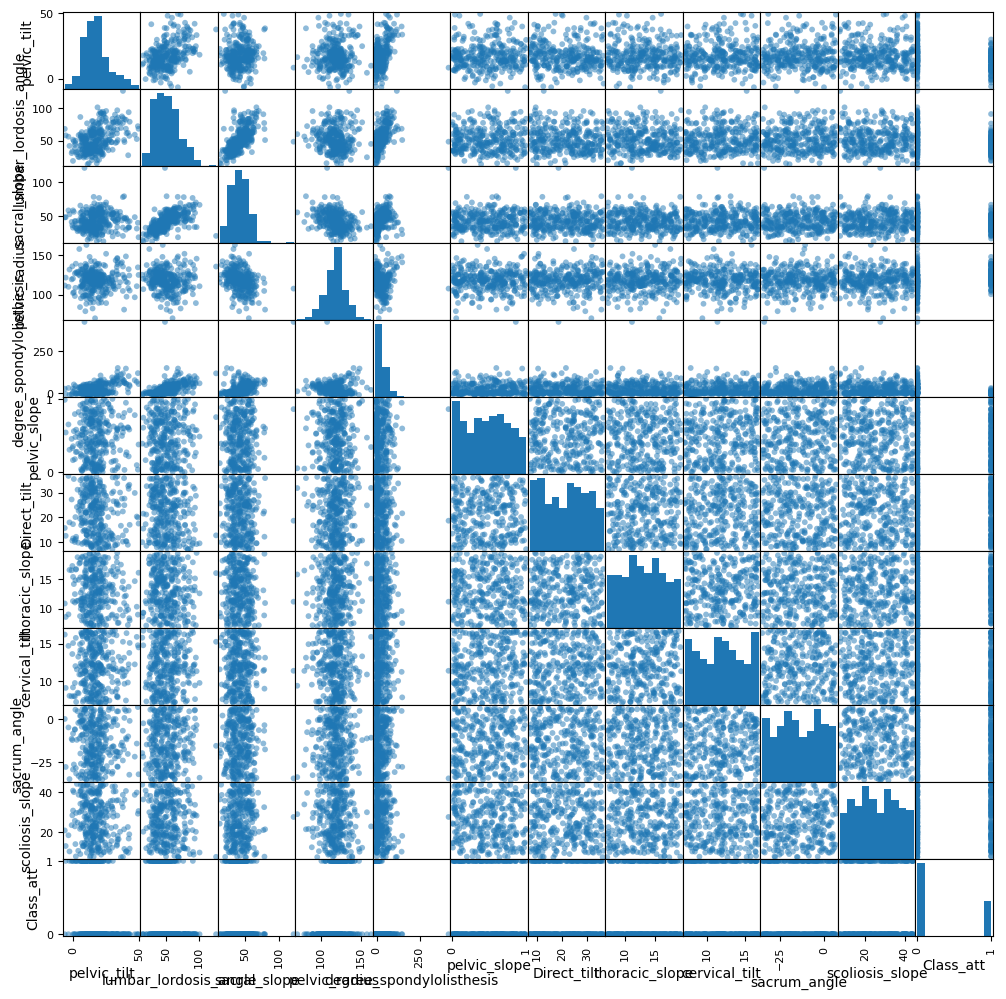

In [ ]:
from pandas.plotting import scatter_matrix
%matplotlib inline

df_factorized = df.apply(lambda x: x.factorize()[0])
df["Class_att"] = df_factorized["Class_att"]
scatter_matrix(df, s=70, figsize=(12, 12), diagonal='hist')


In [ ]:
relacionadas = df.apply(lambda x: x.factorize()[0]).corr()

relacionadas = relacionadas[abs(relacionadas["Class_att"])>0.2]["Class_att"]

relacionadas

pelvic_tilt                 0.809675
lumbar_lordosis_angle       0.646249
sacral_slope                0.692295
pelvic_radius               0.809675
degree_spondylolisthesis    0.809675
pelvic_slope                0.809675
Direct_tilt                 0.809675
thoracic_slope              0.809675
cervical_tilt               0.809675
sacrum_angle                0.809675
scoliosis_slope             0.809675
Class_att                   1.000000
Name: Class_att, dtype: float64

## 3) Árboles de decisión

Aplica árboles de decisión para resolver el problema



### 3.1) Normalización de los datos

Decide razonadamente si es necesario escalar o estandarizar los datos.

### 3.2) Optimizando el número mínimo de ejemplos para dividir un nodo

En este apartado vamos a entrenar nuestro clasificador e intentar dar con una parametrización que aprenda "lo justo", sin quedarse corto, ni sobreaprender.

Para ello, probaremos distintos árboles variando la profundidad máxima y usando validación cruzada en 10 partes. 

Pinta las curvas de apredizaje para distintos valores de dicho parámetro en entrenamiento y validación. Analiza e interpreta las curvas (¿qué puedes decir de cómo varía el comportamiento de clasificador en entrenamiento y validación a medida que cambia el valor del parámetro?) y decide de manera razonada qué valor del parámetro es el que consideras más adecuado.

Los árboles que vas a entrenar deben utilizar la entropía como criterio de selección de variables.

Como sklearn trabaja con arrays, deberás acceder al array interno del dataframe. Crea un array que contenga sólo los datos de entrenamiento (sin la variable a predecir) y otro array que sólo contenga la variable a predecir. Usaremos __todas__ las variables del dataset para construir el árbol.

### 3.3) Analizando el árbol de decisión

Crea un nuevo árbol de decisión con el parámetro elegido en el apartado anterior y dibújalo (si es muy profundo dibuja solamente los primeros niveles). 

Obtén también la importancia de las variables, que es una agregación de su poder discriminante en los distintos nodos del árbol donde se usan (más info [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_)) y píntala en una gráfica.

Con esos gráficos, contesta lo siguiente:

- ¿Cuáles son las variables más importantes y en qué orden? 
- ¿Hay variables del conjunto de datos que no se han usado? 
- ¿Cuál sería la tasa de aciertos (_accuracy_) del árbol sobre el conjunto de entrenamiento si sólo hiciera una pregunta? 
- ¿El árbol que has calculado es capaz de separar las clases? 
- Si no has mostrado el árbol completo, en la parte que estás viendo, ¿qué clases se separan mejor o peor? ¿qué variables ayudan a discriminarlas?
- ¿En cuál de los nodos del segundo nivel del árbol existe mayor confusión (siendo la raíz el nivel 0)?

__Nota__: al dibujar el árbol con la función `plot_tree` el parámetro `class_names` espera recibir una serie de datos de tipo cadena. Puedes convertir la serie de categorías a una serie de cadenas usando `mi_serie.astype('str')`.


## 3.4) Estudiando el error

Calcula la precisión, exhaustividad y valor F1 agregadas usando la profundidad óptima del árbol y validación cruzada en 10 partes. ¿Qué podemos decir sobre el funcionamiento general de nuestro clasificador?

Calcula el informe detallado para cada una de las clases y dibuja la matriz de confusión. ¿Cómo se comporta nuestro clasificador en cada una de las clases?

Finalmente, ¿cómo de fiable te parece? ¿crees que aportaría algo en una empresa real? Analiza las ventajas y desventajas de utilizar un clasificador basado en árboles de decisión en el contexto de este problema.

## 4) Resuelve el mismo problema usando un clasificador k-NN

Busca el valor óptimo para el número de vecinos

## 5) Resuelve el mismo problema usando un clasificador MLP

Optimiza el coeficiente de regularización
